In [1]:
#%matplotlib widget

In [2]:
import numpy as np
import openturns as ot
from matplotlib import cm, colormaps
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import product

In [3]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [4]:
greys = colormaps['Greys']
blues = colormaps['Blues']
reds = colormaps['Reds']
my_greys = ListedColormap(greys(np.linspace(0.25, 1, 128)))
my_blues = ListedColormap(blues(np.linspace(0.25, 1, 128)))
my_reds = ListedColormap(reds(np.linspace(0.2, 1, 128)))

## Empirical Bernstein copula illustration #1

In [5]:
x_points = [0.2, 0.7]
y_points = [0.3, 0.6]
points = ot.Sample(list(product(x_points, y_points)))
weights = [0.3, 0.2, 0.2, 0.3]
discrete_dist = ot.UserDefined(points, weights)

In [6]:
points.getClassName()

'Sample'

In [7]:
class DrawFunctions:
    """
    """
    def __init__(self):
        self.dim = 2
        self.grid_size = 100
        lowerbound = [0.0] * self.dim
        upperbound = [1.0] * self.dim
        self.set_bounds(lowerbound, upperbound)

    def set_bounds(self, lowerbound, upperbound):
        mesher = ot.IntervalMesher([self.grid_size-1] * self.dim)
        interval = ot.Interval(lowerbound, upperbound)
        mesh = mesher.build(interval)
        self.nodes = mesh.getVertices()
        self.X0, self.X1 = np.array(self.nodes).T.reshape(self.dim, self.grid_size, self.grid_size)
        return None

    def draw_3D_surface(self, distributions, colorbars, alphas=[0.8]):
        fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
        for dist, colorbar, alpha in zip(distributions, colorbars, alphas): 
            if dist.getClassName()=="Sample":
                Z = np.array([dist.computeEmpiricalCDF(n) for n in self.nodes]).reshape(self.grid_size, self.grid_size)
            else:
                Z = np.array(dist.computeCDF(self.nodes)).reshape(self.grid_size, self.grid_size)
            ax.plot_surface(self.X0, self.X1, Z, cmap=colorbar, alpha=alpha, rstride=10)
            ax.contour(self.X0, self.X1, Z, cmap=colorbar)
        ax.set_zticks([0.0, 1.0])
        ax.set_zlim(0., 1.)
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")     
        ax.set_zlabel("CDF", rotation=90)
        ax.view_init(elev=30, azim=-120, roll=0)
        return fig, ax

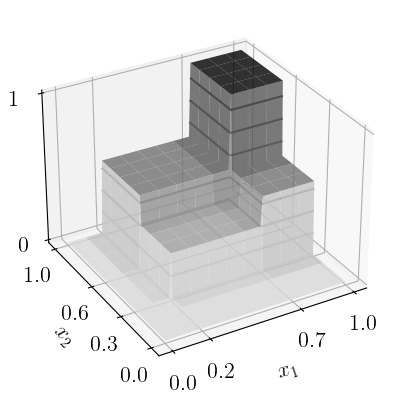

In [8]:
d = DrawFunctions()
fig, ax = d.draw_3D_surface([discrete_dist], [my_greys])
ax.set_xticks([0.0] + x_points + [1.0])
ax.set_yticks([0.0] + y_points + [1.0]);

In [9]:
discrete_sample = discrete_dist.getSample(1000)

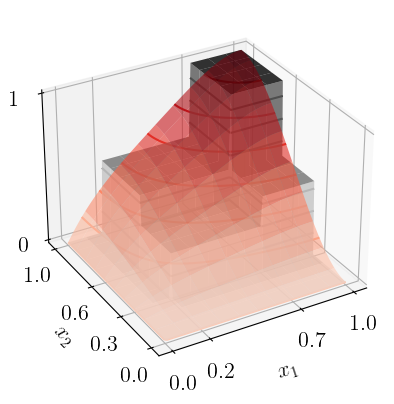

In [10]:
ebc = ot.EmpiricalBernsteinCopula(discrete_sample, 4, True)
fig, ax = d.draw_3D_surface([discrete_dist, ebc], [my_greys, my_reds], [0.8, 0.6])
ax.set_xticks([0.0] + x_points + [1.0])
ax.set_yticks([0.0] + y_points + [1.0]);

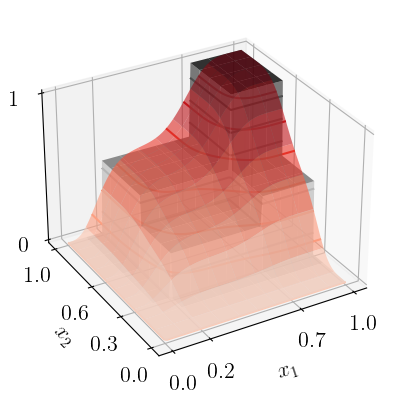

In [11]:
ebc = ot.EmpiricalBernsteinCopula(discrete_sample, 20, True)
fig, ax = d.draw_3D_surface([discrete_dist, ebc], [my_greys, my_reds], [0.8, 0.6])
ax.set_xticks([0.0] + x_points + [1.0])
ax.set_yticks([0.0] + y_points + [1.0]);

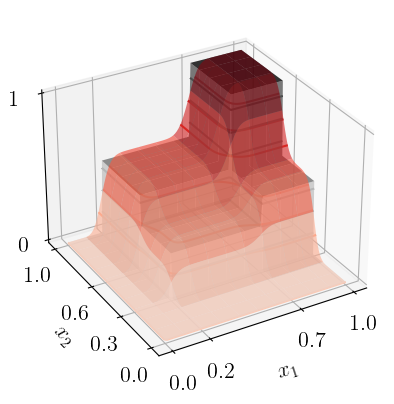

In [12]:
ebc = ot.EmpiricalBernsteinCopula(discrete_sample, 100, True)
fig, ax = d.draw_3D_surface([discrete_dist, ebc], [my_greys, my_reds], [0.8, 0.6])
ax.set_xticks([0.0] + x_points + [1.0])
ax.set_yticks([0.0] + y_points + [1.0]);

## Empirical Bernstein copula illustration #2

In [13]:
n = 10
ot.RandomGenerator.SetSeed(3)
copula = ot.ClaytonCopula(2.5)
copula_sample = copula.getSample(n)
copula_sample

,X0,X1
0,0.2297798,0.6381554
1,0.1860095,0.2357638
2,0.8524075,0.8389278
3,0.8898315,0.1373546
4,0.4802869,0.7023877
5,0.3909408,0.1969964
6,0.6560833,0.7160883
7,0.04134467,0.07066571
8,0.6745198,0.6300254
9,0.02096054,0.009854164


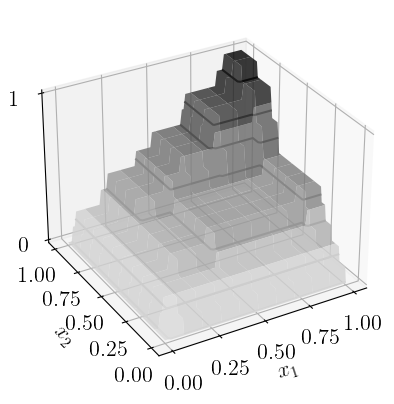

In [14]:
d = DrawFunctions()
d.draw_3D_surface([copula_sample], [my_greys], [0.8])
plt.savefig("figures/empirical_copula.png", dpi=300, bbox_inches='tight', pad_inches=0.4);

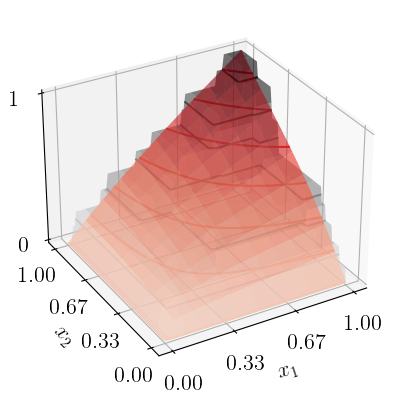

In [15]:
m = 3
ebc = ot.EmpiricalBernsteinCopula(copula_sample, m, True)
fig, ax = d.draw_3D_surface([copula_sample, ebc], [my_greys, my_reds], [0.6, 0.6])
ax.set_xticks(np.linspace(0, 1, m+1).round(2))
ax.set_yticks(np.linspace(0, 1, m+1).round(2))
plt.savefig(f"figures/ebc_m{m}.png", dpi=300, bbox_inches='tight', pad_inches=0.4);

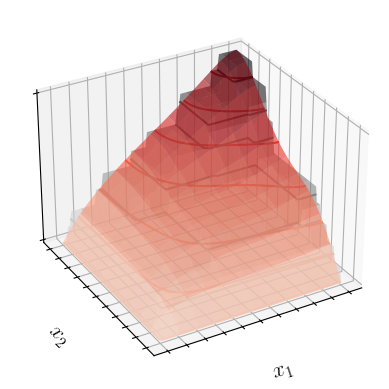

In [16]:
m = 10
ebc = ot.EmpiricalBernsteinCopula(copula_sample, m, True)
fig, ax = d.draw_3D_surface([copula_sample, ebc], [my_greys, my_reds], [0.6, 0.6])
ax.set_xticks(np.linspace(0, 1, m+1).round(2))
ax.set_yticks(np.linspace(0, 1, m+1).round(2))
ax.tick_params(labelbottom=False, labelleft=False)
plt.savefig(f"figures/ebc_m{m}.png", dpi=300, bbox_inches='tight', pad_inches=0.4);

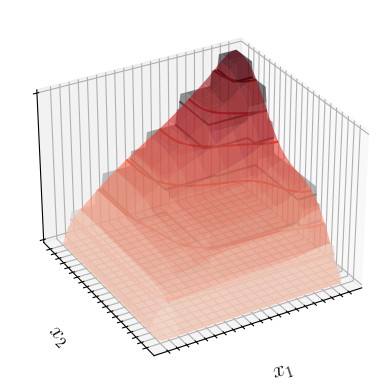

In [17]:
m = 20
ebc = ot.EmpiricalBernsteinCopula(copula_sample, m, True)
fig, ax = d.draw_3D_surface([copula_sample, ebc], [my_greys, my_reds], [0.6, 0.6])
ax.set_xticks(np.linspace(0, 1, m+1).round(2))
ax.set_yticks(np.linspace(0, 1, m+1).round(2))
ax.tick_params(labelbottom=False, labelleft=False)
plt.savefig(f"figures/ebc_m{m}.png", dpi=300, bbox_inches='tight', pad_inches=0.4);

## Asymptotic results

In [18]:
def kimse(dim, n):
    return np.floor(n ** (2 / (dim + 4)))

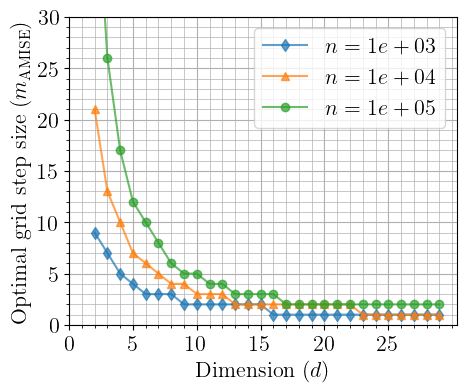

In [19]:
dims = np.arange(2, 30)
ns = np.array([1e3, 1e4, 1e5])
markers = ['d', '^', 'o']

plt.figure(figsize=(5, 4))
plt.grid(which='major', linewidth=0.8)
plt.grid(which='minor', linewidth=0.5)
plt.minorticks_on()
for i, n in enumerate(ns): 
    plt.plot(dims, kimse(dims, n), color='C'+str(i), marker=markers[i], alpha=0.7, label="$n = {:.0e}$".format(n))
plt.xlabel("Dimension ($d$)")
plt.ylabel("Optimal grid step size ($m_{\mathrm{AMISE}}$)")
plt.ylim((0, 30))
plt.legend(loc='best')
plt.xticks(np.arange(0,30, 5))
plt.savefig("figures/hAMISE.png", bbox_inches='tight', dpi=300)